In [1]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats.mstats import gmean
import seaborn as sns
%matplotlib inline
from subprocess import check_output

In [2]:
sub_path = "en"
all_files = os.listdir(sub_path)
all_files

['-1.643.csv',
 'kernel_schnet_-1.327.csv',
 'LGB_-1.481.csv',
 'lgb_5fold_5k_-1.633.csv',
 'lgb_bayes_10k.csv',
 'submission_-1.481.csv',
 'submission_-1.618.csv',
 'submission_-1.619.csv',
 'submission_-1.662.csv']

In [3]:
import warnings
warnings.filterwarnings("ignore")
outs = [pd.read_csv(os.path.join(sub_path, f), index_col=0) for f in all_files]
concat_sub = pd.concat(outs, axis=1)
cols = list(map(lambda x: "mol" + str(x), range(len(concat_sub.columns))))
concat_sub.columns = cols
concat_sub.reset_index(inplace=True)
concat_sub.head()
ncol = concat_sub.shape[1]

In [4]:
concat_sub.iloc[:,1:].corr()

,mol0,mol1,mol2,mol3,mol4,mol5,mol6,mol7,mol8
mol0,1.000000,0.999849,0.999831,0.999973,0.999973,0.999985,0.999982,0.999897,0.999985
mol1,0.999849,1.000000,0.999831,0.999842,0.999842,0.999830,0.999845,0.999805,0.999851
mol2,0.999831,0.999831,1.000000,0.999836,0.999836,0.999822,0.999826,0.999781,0.999834
mol3,0.999973,0.999842,0.999836,1.000000,1.000000,0.999976,0.999965,0.999886,0.999973
mol4,0.999973,0.999842,0.999836,1.000000,1.000000,0.999976,0.999965,0.999886,0.999973
mol5,0.999985,0.999830,0.999822,0.999976,0.999976,1.000000,0.999965,0.999877,0.999970
mol6,0.999982,0.999845,0.999826,0.999965,0.999965,0.999965,1.000000,0.999893,0.999980
mol7,0.999897,0.999805,0.999781,0.999886,0.999886,0.999877,0.999893,1.000000,0.999900
mol8,0.999985,0.999851,0.999834,0.999973,0.999973,0.999970,0.999980,0.999900,1.000000


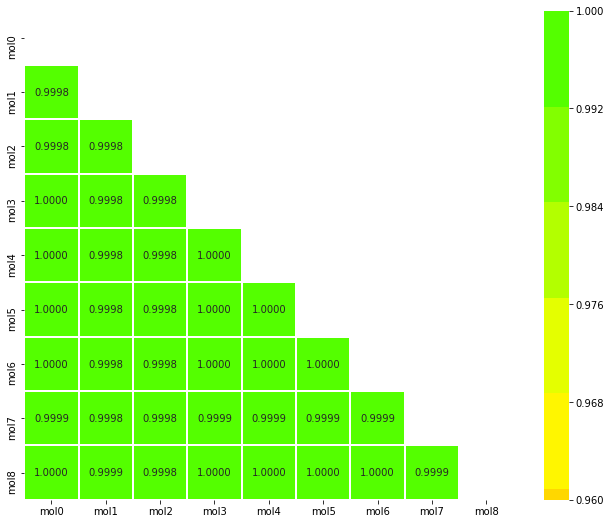

In [5]:
corr = concat_sub.iloc[:,1:].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='prism', vmin=0.96, center=0, square=True, linewidths=1, annot=True, fmt='.4f')

In [6]:
concat_sub['m_max'] = concat_sub.iloc[:, 1:].max(axis=1)
concat_sub['m_min'] = concat_sub.iloc[:, 1:].min(axis=1)
concat_sub['m_median'] = concat_sub.iloc[:, 1:].median(axis=1)

In [7]:
concat_sub.describe()

,id,mol0,mol1,mol2,mol3,mol4,mol5,mol6,mol7,mol8,m_max,m_min,m_median
count,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06
mean,5.910918e+06,1.588595e+01,1.592437e+01,1.588276e+01,1.588665e+01,1.588665e+01,1.588651e+01,1.588590e+01,1.587951e+01,1.588602e+01,1.626133e+01,1.552867e+01,1.588705e+01
std,7.232878e+05,3.486263e+01,3.493039e+01,3.485652e+01,3.486221e+01,3.486221e+01,3.486222e+01,3.486285e+01,3.485677e+01,3.486279e+01,3.504239e+01,3.470583e+01,3.486451e+01
min,4.658147e+06,-3.297185e+01,-2.474941e+01,-2.871717e+01,-3.057991e+01,-3.057991e+01,-3.224631e+01,-3.318558e+01,-3.706147e+01,-3.258725e+01,-2.372552e+01,-3.706147e+01,-3.134178e+01
25%,5.284532e+06,-2.450764e-01,-2.278156e-01,-2.153762e-01,-2.385559e-01,-2.385559e-01,-2.440781e-01,-2.455747e-01,-2.484849e-01,-2.431038e-01,1.069022e-02,-4.632554e-01,-2.343490e-01
50%,5.910918e+06,2.281808e+00,2.290658e+00,2.306064e+00,2.280483e+00,2.280483e+00,2.281441e+00,2.282089e+00,2.279487e+00,2.280120e+00,2.577491e+00,2.010696e+00,2.280620e+00
75%,6.537303e+06,7.356357e+00,7.355250e+00,7.256915e+00,7.343140e+00,7.343140e+00,7.347124e+00,7.357853e+00,7.356561e+00,7.353575e+00,7.723305e+00,6.911885e+00,7.342079e+00
max,7.163688e+06,2.036596e+02,2.057290e+02,2.030659e+02,2.035967e+02,2.035967e+02,2.036153e+02,2.036310e+02,3.161125e+02,2.044570e+02,3.161125e+02,2.028199e+02,2.035967e+02


In [8]:
cutoff_lo = 0.8
cutoff_hi = 0.2

In [9]:
rank = np.tril(concat_sub.iloc[:,1:ncol].corr().values,-1)
m_gmean = 0
n = 8
while rank.max()>0:
    mx = np.unravel_index(rank.argmax(), rank.shape)
    m_gmean += n*(np.log(concat_sub.iloc[:, mx[0]+1]) + np.log(concat_sub.iloc[:, mx[1]+1]))/2
    rank[mx] = 0
    n += 1

In [10]:
concat_sub['m_mean'] = np.exp(m_gmean/(n-1)**2)

In [11]:
concat_sub['scalar_coupling_constant'] = concat_sub['m_mean']
concat_sub[['id', 'scalar_coupling_constant']].to_csv('2_stack_mean.csv', 
                                        index=False, float_format='%.6f')

In [11]:
concat_sub['scalar_coupling_constant'] = concat_sub['m_median']
concat_sub[['id', 'scalar_coupling_constant']].to_csv('3_stack_median.csv', 
                                        index=False)

In [14]:
concat_sub['scalar_coupling_constant'] = np.where(np.all(concat_sub.iloc[:,1:7] > cutoff_lo, axis=1), 1, 
                                    np.where(np.all(concat_sub.iloc[:,1:7] < cutoff_hi, axis=1),
                                             0, concat_sub['m_median']))
concat_sub[['id', 'scalar_coupling_constant']].to_csv('u_stack_pushout_median.csv', 
                                        index=False, float_format='%.6f')

In [15]:
concat_sub['scalar_coupling_constant'] = np.where(np.all(concat_sub.iloc[:,1:7] > cutoff_lo, axis=1), 
                                    concat_sub['m_max'], 
                                    np.where(np.all(concat_sub.iloc[:,1:7] < cutoff_hi, axis=1),
                                             concat_sub['m_min'], 
                                             concat_sub['m_mean']))
concat_sub[['id', 'scalar_coupling_constant']].to_csv('u_stack_minmax_mean.csv', 
                                        index=False, float_format='%.6f')

In [16]:
concat_sub['scalar_coupling_constant'] = np.where(np.all(concat_sub.iloc[:,1:7] > cutoff_lo, axis=1), 
                                    concat_sub['m_max'], 
                                    np.where(np.all(concat_sub.iloc[:,1:7] < cutoff_hi, axis=1),
                                             concat_sub['m_min'], 
                                             concat_sub['m_median']))
concat_sub[['id', 'scalar_coupling_constant']].to_csv('u_stack_minmax_median.csv', 
                                        index=False, float_format='%.6f')

In [17]:
concat_sub['scalar_coupling_constant'] = concat_sub['mol0'].rank(method ='min') + concat_sub['mol1'].rank(method ='min') + concat_sub['mol2'].rank(method ='min') 
concat_sub['scalar_coupling_constant'] = (concat_sub['scalar_coupling_constant']-concat_sub['scalar_coupling_constant'].min())/(concat_sub['scalar_coupling_constant'].max() - concat_sub['scalar_coupling_constant'].min())
concat_sub.describe()
concat_sub[['id', 'scalar_coupling_constant']].to_csv('u_stack_rank.csv', index=False, float_format='%.8f')

In [ ]:
# one = pd.read_csv('../input/chemistry-models/submission-1.619.csv')
# two = pd.read_csv('../input/chemistry-models/submission-1.643.csv')
# three = pd.read_csv('../input/chemistry-models/submission-1.662.csv')

# submission = pd.DataFrame()
# submission['id'] = one.id
# submission['scalar_coupling_constant'] = (0.65*three.scalar_coupling_constant) + (0.25*two.scalar_coupling_constant) + (0.10*one.scalar_coupling_constant)

# submission.to_csv('Aggblender.csv', index=False)